# Walmart_Recruiting_Sales_prediction

In [7]:
# library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.special import boxcox1p
import seaborn as sns

In [14]:
# loading data
features = pd.read_csv('Data/features.csv')
store= pd.read_csv("Data/stores.csv")
train= pd.read_csv('Data/train.csv')
test=pd.read_csv('Data/test.csv')

### Data wrangling and Feature engineering

In [15]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [16]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [17]:
train = train.groupby(['Store','Date'])['Weekly_Sales'].sum()
train = train.reset_index()
train.head()

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68


In [18]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [19]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [21]:
# merging train and features
train_features = pd.merge(train,features, on=['Store','Date'],how = 'inner')
train_features.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [22]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [23]:
store.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [24]:
# merging store and train_features dataset
data = pd.merge(train_features,store, on=['Store'], how='inner')
data.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [25]:
# Sorting values by data
data = data.sort_values(by='Date')
data.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1287,10,2010-02-05,2193048.75,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,False,B,126512
5148,37,2010-02-05,536006.73,45.97,2.572,NaN,NaN,NaN,NaN,NaN,209.852966,8.554,False,C,39910
2288,17,2010-02-05,789036.02,23.11,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,6.548,False,B,93188
4147,30,2010-02-05,465108.52,39.05,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,False,C,42988


### Exploratory Data Analysis

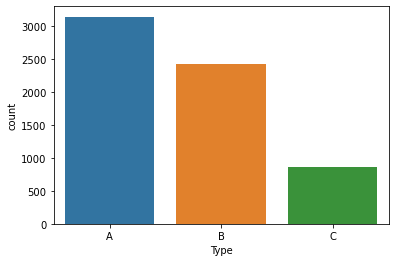

In [28]:
sns.countplot(x="Type", data= data)
plt.show()

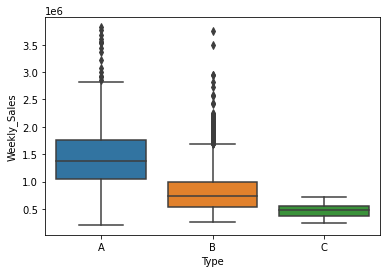

In [30]:
sns.boxplot(x='Type', y='Weekly_Sales', data=data)
plt.show()

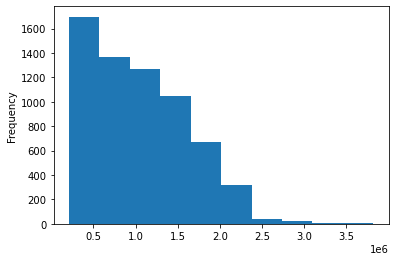

In [32]:
data['Weekly_Sales'].plot.hist()
plt.show()

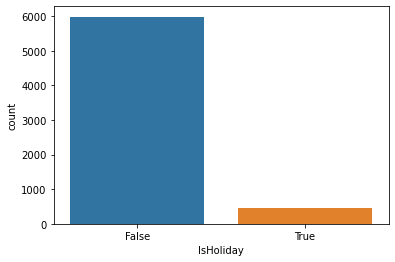

In [34]:
sns.countplot(x='IsHoliday', data=data)
plt.show()

In [35]:
data.isnull().sum()

Store              0
Date               0
Weekly_Sales       0
Temperature        0
Fuel_Price         0
MarkDown1       4155
MarkDown2       4798
MarkDown3       4389
MarkDown4       4470
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
Type               0
Size               0
dtype: int64

In [36]:
# Droping columns with null values
data.drop(['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5'], inplace=True, axis =1)
data.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988


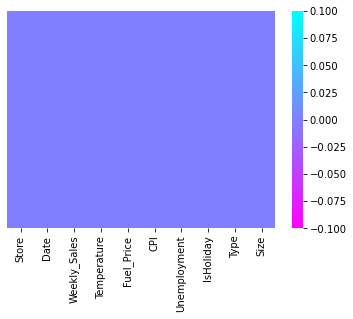

In [45]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='cool_r')
plt.show()

In [47]:
# Converting IsHoliday to logical outcomes of 1-Holiday and 0-NoHoliday
data['Holiday'] = [int(i) for i in list(data.IsHoliday)]
data.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Holiday
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315,0
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512,0
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910,0
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188,0
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988,0


In [48]:
type_dummy = pd.get_dummies(data['Type'], drop_first=True)
type_dummy.head()

,B,C
0,0,0
1287,1,0
5148,0,1
2288,1,0
4147,0,1


In [49]:
#concating type_dummy with data
data = pd.concat([data,type_dummy],axis=1)
data.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Holiday,B,C
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315,0,0,0
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512,0,1,0
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910,0,0,1
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188,0,1,0
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988,0,0,1


In [51]:
data.drop(['Type','IsHoliday'], inplace=True, axis = 1)


KeyError: "['Type' 'IsHoliday'] not found in axis"

In [52]:
data.drop(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Holiday,B,C
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,151315,0,0,0
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,126512,0,1,0
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,39910,0,0,1
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,93188,0,1,0
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,42988,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3574,25,2012-10-26,688940.94,56.69,3.882,216.151590,7.293,128107,0,1,0
714,5,2012-10-26,319550.77,71.70,3.506,224.037814,5.422,34875,0,1,0
5719,40,2012-10-26,921264.52,49.65,3.917,138.728161,4.145,155083,0,0,0
2573,18,2012-10-26,1127516.25,56.09,3.917,138.728161,8.243,120653,0,1,0


In [53]:
data

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Holiday,B,C
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,151315,0,0,0
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,126512,0,1,0
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,39910,0,0,1
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,93188,0,1,0
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,42988,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3574,25,2012-10-26,688940.94,56.69,3.882,216.151590,7.293,128107,0,1,0
714,5,2012-10-26,319550.77,71.70,3.506,224.037814,5.422,34875,0,1,0
5719,40,2012-10-26,921264.52,49.65,3.917,138.728161,4.145,155083,0,0,0
2573,18,2012-10-26,1127516.25,56.09,3.917,138.728161,8.243,120653,0,1,0


## Prediction

In [59]:
# Splitting data in input and output
X = data.drop(['Weekly_Sales','Store','Date'], axis = 1)
y = data['Weekly_Sales']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [60]:
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)

LinearRegression(normalize=True)

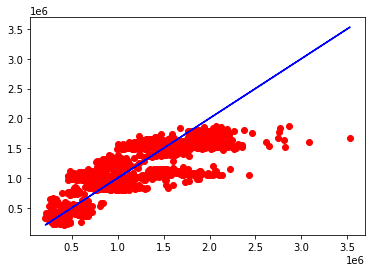

In [61]:
y_pred = LR.predict(X_test)
plt.plot(y_test,y_pred,'ro')
plt.plot(y_test,y_test,'b-')
plt.show()

In [62]:
Root_mean_square_error=np.sqrt(np.mean(np.square(y_test-y_pred)))
print(Root_mean_square_error)

312762.970188149


In [ ]:
Walmart_rec